In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from iminuit import Minuit

# Importing and visualising Data

In [2]:
dat = np.genfromtxt(fname='datafile-higgs.txt')

In [3]:
type(dat)

numpy.ndarray

In [4]:
dat

array([7.83638931, 2.63155278, 0.85325719, ..., 6.02879738, 0.76266385,
       0.94014184])

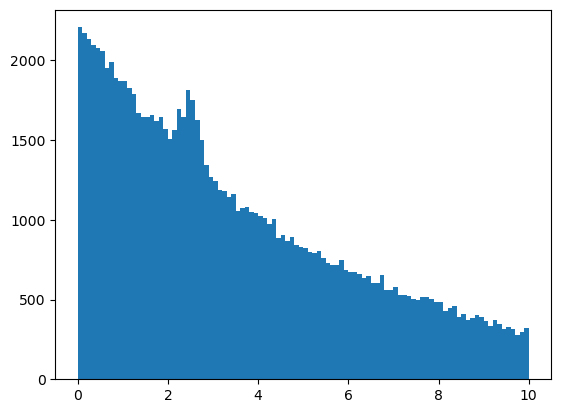

In [5]:
plt.hist(dat,bins=100)
plt.show()

total # of events = 341785.14540157386 # of bins = 100000


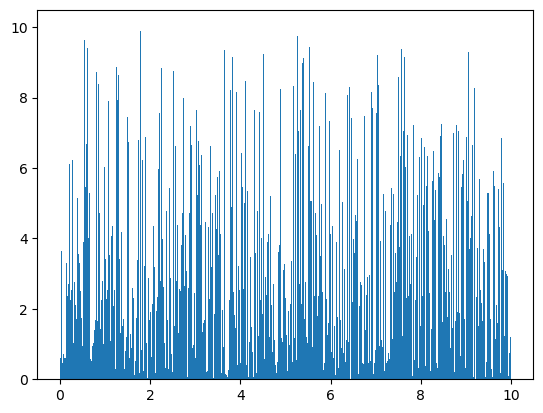

In [8]:
nbins = len(counts)
XMIN = 0  # in GeV
XMAX = 10  # in GeV

bins = np.linspace(XMIN, XMAX, nbins)
counts = dat

tot = 0
for i in counts:
    tot += i
print("total # of events =", tot, "# of bins =", len(counts))
plt.hist(bins, bins=len(counts), weights=counts, range=(min(bins), max(bins)))
plt.show()

# Question 1 (fitting data with exponential noise)

Defining normalised exponential function

In [4]:
def exp_funct(x,decay_cons):
    exponential = lambda x: np.exp(-x/decay_cons)

    return np.exp(-x/decay_cons)/quad(exponential,0,10)[0]

Defining normalised gaussian function

In [5]:
def gauss_funct(x,mean):
    def gauss(x,mean):
          return (1/(0.2*((2*math.pi)**(1/2)))*math.e**((-1/2)*((x-mean)/0.2)**2))
    def nor_gauss(x):
        return quad(gauss,0,10,args=(mean))
    return gauss(x,mean)/nor_gauss(x)[0]

Defining negative log joint likelihood function for (gaussian signal on exponential backgrown)

In [6]:
def fnct1(decay_cons,mean,fraction):
    pdf = fraction*gauss_funct(dat,mean)+(1-fraction)*exp_funct(dat,decay_cons)
    return -np.sum(np.log(pdf))

Minimising NLL to find optimal parameters

In [7]:
les1=Minuit(fnct1,decay_cons=2.3,mean=2.5,fraction=0.05)
les1.errordef=0.5
les1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.146e+05                  │              Nfcn = 116              │
│ EDM = 6.29e-07 (Goal: 0.0001)    │            time = 1.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ decay_cons │   5.008   │   0.031   │            │            │         │         │       │
│ 1 │ mean       │   2.499   │   0.015   │            │            │         │         │       │
│ 2 │ fraction   │  0.0204   │  0.0012   │            │            │         │         │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬──────────────────────────────────┐
│            │ decay_cons       mean   fraction │
├────────────┼──────────────────────────────────┤
│ decay_cons │   0.000945   -1.7e-05   3.99e-06 │
│       mean │   -1.7e-05   0.000212  -7.14e-07 │
│   fraction │   3.99e-06  -7.14e-07   1.33e-06 │
└────────────┴──────────────────────────────────┘

In [8]:
statistical_error1=les1.errors[1]
print(f'calculated mean of signal is = {les1.values[1]:.2f} +- {statistical_error1:.2f}         (+- Statistical error)')

calculated mean of signal is = 2.50 +- 0.01         (+- Statistical error)


# Question 2 (fit with poly)

Defining normalised polynomial function

In [9]:
def poly_funct(x,a,b,c):
    def poly(x,a,b,c):
        return a+ b*x + c*x**2
    def nor_poly (x):
        return quad(poly, 0, 10, args=(a,b,c))
    return poly(x,a,b,c)/nor_poly (x)[0]

Defining negative log joint likelihood function for (gaussian signal on polynomial backgrown)

In [10]:
def fnct2_1(fraction,mean,a,b,c):
    NLL=0
    pdf = fraction*gauss_funct(dat,mean)+(1-fraction)*poly_funct(dat,a,b,c)
    for i in range(len(dat)): 
        if pdf[i]<= 0:
            pdf[i]=0.0001
    return -np.sum(np.log(pdf))

Minimising NLL to find optimal parameters

In [11]:
les2=Minuit(fnct2_1,a=1,b=-0.016,c=0.007,mean=2.5,fraction=0.02)
les2.errordef=0.5
les2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.146e+05                  │              Nfcn = 158              │
│ EDM = 7.01e-07 (Goal: 0.0001)    │            time = 7.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ fraction │  0.0180   │  0.0012   │            │            │         │         │       │
│ 1 │ mean     │   2.494   │   0.016   │            │            │         │         │       │
│ 2 │ a        │   0.976   │   0.013   │            │            │         │         │       │
│ 3 │ b        │  -0.1539  │  0.0018   │            │            │         │         │       │
│ 4 │ c        │  7.12e-3  │  0.12e-3  │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │  fraction      mean         a         b         c │
├──────────┼───────────────────────────────────────────────────┤
│ fraction │  1.35e-06 -7.23e-07   1.7e-07  1.42e-08  1.05e-09 │
│     mean │ -7.23e-07  0.000244 -3.75e-06 -1.35e-07  4.69e-08 │
│        a │   1.7e-07 -3.75e-06  0.000165 -1.87e-05  3.95e-07 │
│        b │  1.42e-08 -1.35e-07 -1.87e-05  3.19e-06 -1.62e-07 │
│        c │  1.05e-09  4.69e-08  3.95e-07 -1.62e-07  1.42e-08 │
└──────────┴───────────────────────────────────────────────────┘

Calculating errors

In [12]:
systamatic_error1=les1.values[1]-les2.values[1]
statistical_error1=les1.errors[1]
total_error1=np.sqrt(systamatic_error1**2+statistical_error1**2)

In [13]:
print(f'Statistical error on signal is +- {statistical_error1}')
#Using statistical error from exponential fit

print(f'Systematic error on signal is  +- {systamatic_error1} (we will roundoff in final step)')
#For our case it is difference between Signal with exponential noise vs linear noise

print()
print(f'calculated mean of signal is = {les1.values[1]:.2f} +- {statistical_error1:.2f} +- {systamatic_error1:.2f} (+- statistical +- systamatic errors)')
print(f'calculated mean of signal is = {les1.values[1]:.2f} +- {total_error1:.2f}         (+- total error)')

Statistical error on signal is +- 0.014570247938694998
Systematic error on signal is  +- 0.004240395158150889 (we will roundoff in final step)

calculated mean of signal is = 2.50 +- 0.01 +- 0.00 (+- statistical +- systamatic errors)
calculated mean of signal is = 2.50 +- 0.02         (+- total error)


Importance of systematic error as compared to statistical error

Systematic errors are much more problematic than statistical errors because they can skew your data to lead you to false conclusions. If you have systematic error, your measurements will be biased away from the true values. And you can never be sure about if you have taken account of all possible Systamatic errors. In above example Systematic error is insignificant in calculation, But it is not always the case.

# Question 3 (fit with linear)

Defining normalised linear function

In [14]:
def lin_funct(x,a,b):
    def lin(x,a,b):
        return a + b*x 
    def nor_lin (x):
        return quad(lin, 0, 10, args=(a,b))
    return lin(x,a,b)/nor_lin (x)[0]

Defining negative log joint likelihood function for (gaussian signal on linear backgrown)

In [15]:
def fnct3_1(fraction,mean,a,b):
    pdf = fraction*gauss_funct(dat,mean)+(1-fraction)*lin_funct(dat,a,b)
    for i in range(len(dat)): 
        if pdf[i]<= 0:
            pdf[i]=0.0001
    return -np.sum(np.log(pdf))

Minimising NLL to find optimal parameters

In [16]:
les3=Minuit(fnct3_1,a=1,b=-0.09,mean=2.5,fraction=0.02)
les3.errordef=0.5
les3.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.155e+05                  │              Nfcn = 77               │
│ EDM = 5.42e-06 (Goal: 0.0001)    │            time = 3.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ fraction │  0.0199   │  0.0012   │            │            │         │         │       │
│ 1 │ mean     │   2.465   │   0.015   │            │            │         │         │       │
│ 2 │ a        │   0.998   │   0.015   │            │            │         │         │       │
│ 3 │ b        │  -0.0902  │  0.0014   │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────┐
│          │  fraction      mean         a         b │
├──────────┼─────────────────────────────────────────┤
│ fraction │  1.35e-06 -6.14e-07  1.74e-07  1.78e-08 │
│     mean │ -6.14e-07  0.000229 -2.67e-07 -2.73e-08 │
│        a │  1.74e-07 -2.67e-07  0.000235 -2.09e-05 │
│        b │  1.78e-08 -2.73e-08 -2.09e-05  1.92e-06 │
└──────────┴─────────────────────────────────────────┘

# Quoating signal mean and error after final evaluation (question 3)

Using maximum difference between mean of signal from all fits as systamatic error.

In [17]:
systamatic_error=les1.values[1]-les3.values[1]
#For our case it is difference between Signal with exponential noise vs linear noise 
print(f'Systamatic error on signal is +- {systamatic_error:.2f}')

Systamatic error on signal is +- 0.03


Using statistical error from exponential fit

In [18]:
statistical_error=les1.errors[1]
print(f'Statistical error on signal is +- {statistical_error:.2f}')

Statistical error on signal is +- 0.01


calculating quadrature of errors

In [19]:
total_error=np.sqrt(systamatic_error**2+statistical_error**2)
print(f'Total error on signal is +- {total_error:.2f}')

Total error on signal is +- 0.04


Calculated mean of signal 

In [20]:
print(f'calculated mean of signal is = {les1.values[1]:.2f} +- {statistical_error:.2f} +- {systamatic_error:.2f} (+- statistical +- systamatic errors)')
print(f'calculated mean of signal is = {les1.values[1]:.2f} +- {total_error:.2f}         (+- total error)')

calculated mean of signal is = 2.50 +- 0.01 +- 0.03 (+- statistical +- systamatic errors)
calculated mean of signal is = 2.50 +- 0.04         (+- total error)


Importance of systematic error as compared to statistical error

Systematic errors are much more problematic than statistical errors because they can skew your data to lead you to false conclusions. If you have systematic error, your measurements will be biased away from the true values. And you can never be sure about if you have taken account of all possible Systamatic errors. In above example It is clear that systematic error has altered the observations quite heavely, Hence we should always account for systematic error to avoid any biases.